In [1]:
# Importando as bibliotecas
import pymusas
import pandas as pd
import spacy
import os
import matplotlib.pyplot as plt
import requests

# Repositiorio que deve ser clonado: https://github.com/UCREL/Multilingual-USAS.git

# instale pyMUSAS: pip install pymusas

# Depois instale dependencias do spacy:
# pip install https://github.com/UCREL/pymusas-models/releases/download/en_dual_upos2usas_contextual-0.3.3/en_dual_upos2usas_contextual-0.3.3-py3-none-any.whl
# pip install https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.3/en_dual_none_contextual-0.3.3-py3-none-any.whl
# python -m spacy download pt_core_news_sm
# Documentação que pode ajudar: https://ucrel.github.io/pymusas/

# pip install https://github.com/UCREL/pymusas-models/releases/download/es_dual_upos2usas_contextual-0.3.3/es_dual_upos2usas_contextual-0.3.3-py3-none-any.whl
# python3 -m spacy download es_core_news_sm


In [2]:
plots = pd.read_csv("./data/oscar_full_plot.csv", sep=';')
plots.set_index("TITULO", inplace = True)

In [3]:
nlp_pt = spacy.load('pt_core_news_sm', exclude=['parser', 'ner'])
portuguese_tagger_pipeline = spacy.load('pt_dual_upos2usas_contextual')
nlp_pt.add_pipe('pymusas_rule_based_tagger', source=portuguese_tagger_pipeline)

nlp_en = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])
english_tagger_pipeline = spacy.load('en_dual_none_contextual')
nlp_en.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

nlp_es = spacy.load('es_core_news_sm', exclude=['parser', 'ner'])
spanish_tagger_pipeline = spacy.load('es_dual_upos2usas_contextual')
nlp_es.add_pipe('pymusas_rule_based_tagger', source=spanish_tagger_pipeline)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/lib/python3.11/site-packages/pymusas/spacy_api/utils.py:38: UserWarning: Overwritten the spaCy Token extension `pymusas_tags` which currently has the following (default, method, getter, setter):`(None, None, None, None)`. And replacing it with the following:`(None, None, None, None)`. This would only become a problem if the the two Tuples of four are different, if they are the same there is no problem.
  warnings.warn(message)
/opt/homebrew/lib/python3.11/site-packages/pymusas/spacy_api/utils.py:38: UserWarning: Overwritten the spaCy Token extension `pymusas_mwe_indexes` which currently has the following (default, method, getter, setter):`(None, None, None, None)`. And replacing it with the following:`(None, None, None, None)`. 

In [29]:
# Função para processar cada texto
def process_text(text):
    output_doc = nlp_pt(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

In [30]:
path = './data/plots_pt'
text = ""
list_files = os.listdir(path)

In [32]:
# list_files = ['In Old Chicago.txt', 'Kramer vs. Kramer.txt', 'To Kill a Mockingbird (filme).txt', 'Seven Brides for Seven Brothers.txt', 'Philomena.txt', 'All This, and Heaven Too.txt', 'On Golden Pond.txt', 'Judgment at Nuremberg.txt', 'Julia (filme).txt', 'Arrival (filme).txt', 'Rain Man.txt', 'Goodfellas.txt', 'Gosford Park.txt', "Guess Who's Coming to Dinner.txt", 'O Diário de Anne Frank.txt', 'The Snake Pit.txt', 'Hold Back the Dawn.txt', 'Meia-Noite em Paris.txt', 'Viskningar och rop.txt', 'Moulin Rouge!.txt', 'Chariots of Fire.txt', 'The Good Earth.txt', 'An Education.txt', 'A Rainha.txt', 'Watch on the Rhine.txt', 'Cabaret (filme).txt', 'Gaslight.txt', 'Cavalo de Guerra.txt', 'Fiddler on the Roof (filme).txt', 'Howards End (filme).txt', 'A Vida É Bela.txt', 'Since You Went Away.txt', 'O Tenente Sedutor.txt', 'Ivanhoe (1952).txt', 'A Cor Púrpura (filme de 1985).txt', 'Birdman ou (A Inesperada Virtude da Ignorância).txt', 'Gangs of New York.txt', 'Lanceiros da Índia.txt', 'Ninotchka.txt', "King Solomon's Mines (filme de 1950).txt", '49th Parallel.txt', 'Vidas Separadas.txt', 'Reds.txt', 'Os Descendentes.txt', 'Uma Loira para Três.txt', 'Atonement.txt', 'Argo (filme).txt', 'The Crying Game.txt', 'A Carta (1940).txt', 'Sense and Sensibility (filme).txt', 'True Grit (2010).txt', 'Imitation of Life (1934).txt', 'Jezebel.txt', 'Three Coins in the Fountain.txt', 'As Horas (filme).txt', 'All About Eve.txt', 'A Canção de Bernadette.txt', 'A Favorita (filme).txt', 'Tess (filme).txt', 'Elizabeth (filme).txt', 'Oliver!.txt', 'Adversidade.txt', 'A Ponte do Rio Kwai.txt', 'Women Talking.txt', 'The Killing Fields.txt', "The Nun's Story.txt", 'O Último Imperador.txt', 'An American in Paris.txt', 'My Fair Lady.txt', 'A Streetcar Named Desire.txt', 'Trader Horn.txt', 'The Private Life of Henry VIII.txt', 'Traffic (filme).txt', 'A Farewell to Arms (1932).txt', 'West Side Story (1961).txt', 'The Philadelphia Story.txt', 'Selma (filme).txt', 'Wuthering Heights (filme de 1939).txt', 'Shakespeare in Love.txt', 'The Turning Point (1977).txt']
results = []
for file in list_files:
    name = file.split(".txt")
    # if name[0] in plots["TITLE_PT"].values:
    #if name[0] in plots["TITULO"].values:
    article = open(path + "/" + file, 'r')
    content = article.read()
    result = process_text(content)
    for e in result:
        if 'B1' in e["USAS Tags"]:
            print(e['Text'])
    results.append(result)
len(results)

corpo
física
coração
novo
ligações
ponto
ponto
membro
troca
troca
novo
período
natal
membros
membro
lado
branco
mãos
rosto
troca
espera
pernas
novo
Tom
mão
lados
arma
membros
beira
corda
cordas
nascimento
seio
mãos
lado
membros
nascimento
membros
membros
membros
membro
troca
Língua
branco
novo
corpo
circulação
trás
caminhadas
costa
lado
lado
membro
mãos
particular
corpo
biológica
de
volta
líder
mordida
ouvido
atrás
idéias
Descalço
novas
Tom
branca
de
quatro
origem
mãos
vento
novo
esperar
privado
esperar
figura
cabeça
cérebro
grávida
gravidez
líder
novo
sistema
de
volta
atrás
costa
corda
cela
cano
corda
novo
bateram
ossos
saco
cabeça
corpo
água
mãos
braços
mãos
telhado
Tom
dinâmica
de
quatro
Tom
costa
bordo
embarcação
cofre
troca
esperando
costa
nave
atrás
embarcação
arma
bordo
região
brancos
arma
branco
brancos
troca
cela
líder
esperando
tecido
naves
pontos
físico
naves
água
período
membro
período
novo
região
face
de
volta
Tom
região
água
água
troca
troca
ligação
ligação
pés
sangue
fec

471

In [24]:
# url = "https://ucrel.lancs.ac.uk/usas/semtags_subcategories.txt"
# response = requests.get(url)

# # Check if the request was successful (status code 200)
# if response.status_code == 200:
#     # Save the content of the response to a local CSV file
#     with open("pymusas_dict.csv", "wb") as f:
#         f.write(response.content)
#     print("CSV file downloaded successfully")
# else:
#     print("Failed to download CSV file. Status code:", response.status_code)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("pymusas_dict.csv", sep=";")
df["Count"] = [0 for i in range(len(df))]
df.set_index('Tag', inplace=True)
df

Categoria  Count
Tag                                              
A1              General And Abstract Terms      0
A2                                  Affect      0
A4                          Classification      0
A5                              Evaluation      0
A6                               Comparing      0
..                                     ...    ...
X7             Wanting: planning: choosing      0
X8                                  Trying      0
X9                                 Ability      0
Y1       Science and technology in general      0
Y2    Information technology and computing      0

[101 rows x 2 columns]

In [25]:
for result in results:
    for sub_result in result:
        for tag in sub_result['USAS Tags']:
            if tag in df.index:
                df.at[tag, 'Count'] += 1

df["Count"] = df["Count"] / df["Count"].sum()
df = df.reset_index()

df = df.sort_values(by="Count", ascending=False)
df

Tag                              Categoria     Count
56   M6                 Location and direction  0.235102
83   T3          Time: Old, new and young: age  0.091356
64   O2                      Objects generally  0.043549
60   N4                           Linear order  0.042895
51   M1               Moving, coming and going  0.031107
..  ...                                    ...       ...
9   A11                             Importance  0.000000
72   S1   Social Actions, States And Processes  0.000000
76   S5                 Groups and affiliation  0.000000
77   S6               Obligation and necessity  0.000000
0    A1             General And Abstract Terms  0.000000

[101 rows x 3 columns]

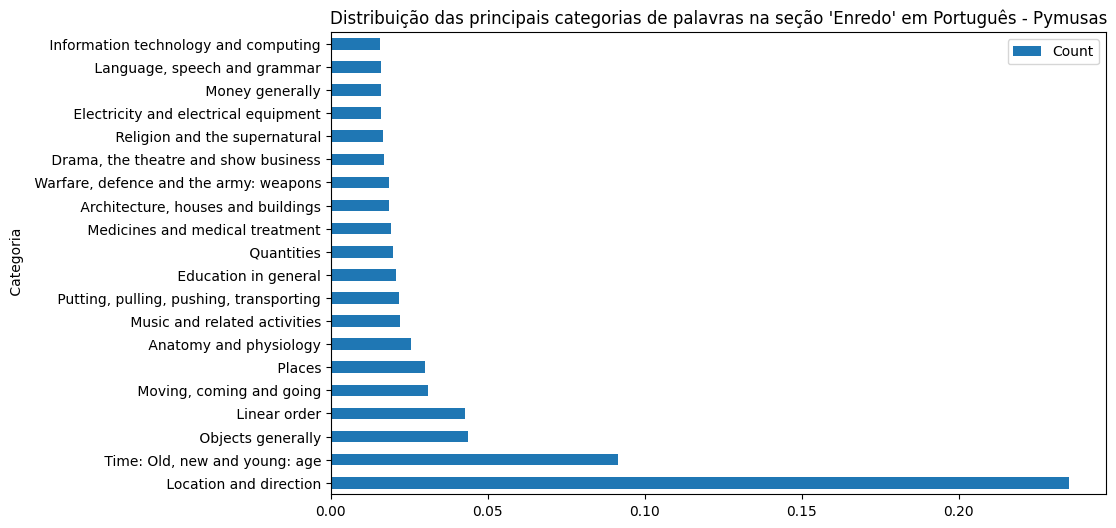

In [26]:
df_plot = df.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras na seção 'Enredo' em Português - Pymusas")
plt.yticks(fontsize=10)
plt.show()

In [33]:
path = './data/plots_en'
text = ""
list_files = os.listdir(path)
print(list_files)

['Peyton Place (film).txt', 'The Good Earth (film).txt', 'Crossfire (film).txt', 'Black Panther (film).txt', 'The Favourite.txt', 'Barry Lyndon.txt', 'Heaven Can Wait (1978 film).txt', 'Extremely Loud & Incredibly Close (film).txt', 'Boys Town (film).txt', 'Dunkirk (2017 film).txt', 'Three Billboards Outside Ebbing, Missouri.txt', 'The Bridge on the River Kwai.txt', 'America America.txt', 'Philomena (film).txt', 'Mutiny on the Bounty (1962 film).txt', 'Hacksaw Ridge.txt', 'Crash (2004 film).txt', 'Nicholas and Alexandra.txt', 'Jerry Maguire.txt', 'Bugsy.txt', 'Five Star Final.txt', 'The Accidental Tourist (film).txt', 'The Towering Inferno.txt', 'In Old Chicago.txt', 'Mr. Smith Goes to Washington.txt', 'Midnight Cowboy.txt', 'Marty (film).txt', 'Out of Africa (film).txt', 'The Godfather Part II.txt', 'Wuthering Heights (1939 film).txt', 'The Broadway Melody.txt', 'Spotlight (film).txt', 'Field of Dreams.txt', 'Witness (1985 film).txt', 'Seabiscuit (film).txt', 'Kramer vs. Kramer.txt', 

In [34]:
# Função para processar cada texto
def process_text(text):
    output_doc = nlp_en(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

In [37]:
# list_files = ['The Favourite.txt', 'Philomena (film).txt', 'Nicholas and Alexandra.txt', 'Wuthering Heights (1939 film).txt', 'Babe (film).txt', 'All This, and Heaven Too.txt', 'Dangerous Liaisons.txt', 'Three Coins in the Fountain (film).txt', 'Gosford Park.txt', 'A Room with a View (1985 film).txt', 'The Sound of Music (film).txt', 'Gigi (1958 film).txt', 'The Song of Bernadette (film).txt', 'Moulin Rouge!.txt', 'Elizabeth (film).txt', 'Beauty and the Beast (1991 film).txt', 'Grand Hotel (1932 film).txt', 'East Lynne (1931 film).txt', 'The Patriot (1928 film).txt', 'Darkest Hour (film).txt', 'Lawrence of Arabia (film).txt', 'My Fair Lady (film).txt', "It's a Wonderful Life.txt", 'Bohemian Rhapsody (film).txt', 'The Heiress.txt', 'Tess (1979 film).txt', 'Ninotchka.txt', 'The Barretts of Wimpole Street (1934 film).txt', 'Sense and Sensibility (film).txt', 'Life Is Beautiful.txt', 'Ivanhoe (1952 film).txt', 'Hugo (film).txt', 'Dodsworth (film).txt', 'Witness for the Prosecution (1957 film).txt', 'Four Weddings and a Funeral.txt', 'The Grand Budapest Hotel.txt', 'The Red Shoes (1948 film).txt', 'Cavalcade (1933 film).txt', 'Atonement (2007 film).txt', 'Hamlet (1948 film).txt', 'Naughty Marietta (film).txt', 'The Banshees of Inisherin.txt', 'Henry V (1944 film).txt', 'Ben-Hur (1959 film).txt', 'Captain Blood (1935 film).txt', "The King's Speech.txt", 'A Farewell to Arms (1932 film).txt', 'Quo Vadis (1951 film).txt', 'The Adventures of Robin Hood.txt', 'The Last Emperor.txt', 'Gladiator (2000 film).txt', 'A Streetcar Named Desire (1951 film).txt', 'The Elephant Man (film).txt', 'Pygmalion (1938 film).txt', 'David Copperfield (1935 film).txt', 'The Smiling Lieutenant.txt', 'Tom Jones (1963 film).txt', 'Fiddler on the Roof (film).txt', 'Shanghai Express (film).txt', 'Heaven Can Wait (1943 film).txt', 'A Passage to India (film).txt', "The Bishop's Wife.txt", 'Cleopatra (1963 film).txt', 'Around the World in 80 Days (1956 film).txt', 'Braveheart.txt', 'Finding Neverland (film).txt', 'Howards End (film).txt', 'The Robe (film).txt', 'The Private Life of Henry VIII.txt', 'Moulin Rouge (1952 film).txt', 'A Man for All Seasons (1966 film).txt', 'Suspicion (1941 film).txt', 'Disraeli (1929 film).txt', 'Anthony Adverse.txt', 'The Life of Emile Zola.txt', 'Amadeus (film).txt', 'The Queen (2006 film).txt', 'Fanny (1961 film).txt', 'Les Misérables (2012 film).txt', 'One Hour with You.txt', 'Zorba the Greek (film).txt', 'Shakespeare in Love.txt']
results = []
for file in list_files:
    name = file.split(".txt")
    article = open(path + "/" + file, 'r')
    content = article.read()
    result = process_text(content)
    for e in result:
        if 'S9' in e["USAS Tags"]:
            print(e['Text'])
    results.append(result)
len(results)
# print(i)

witnesses
sign
confession
save
Jewish
office
superhuman
ritual
ritual
witnesses
saves
Ministry
unfaithful
high
high
religious
signs
afterlife
Leo
celebration
missions
witnessing
confession
witnesses
mission
saves
saves
save
saved
save
saves
witnessed
signs
mission
witnesses
ritual
mission
Witnessing
witnesses
saved
sign
unrepentant
Christian
mission
ominous
mission
paradise
Christian
Christian
Christian
Christian
Christian
religious
saves
save
save


KeyboardInterrupt: 

In [42]:
df = pd.read_csv("pymusas_dict.csv", sep=";")
df["Count"] = [0 for i in range(len(df))]
df.set_index('Tag', inplace=True)

# categ_validas = ["General And Abstract Terms", "Affect", "Being", "Classification", "Evaluation", "Comparing", "Probability", "Seem", "Getting and giving; possession", "Open/closed; Hiding/Hidden; Finding; Showing", "Importance", "Easy/difficult", "Degree", "Exclusivizers/particularizers", "Safety/Danger", "Anatomy and physiology", "Health and disease", "Medicines and medical treatment", "Cleaning and personal care", "Clothes and personal belongings", "Arts and crafts", "Emotional Actions, States And Processes General", "Liking", "Calm/Violent/Angry", "Happiness and Contentment", "Bravery and Fear", "Worry and confidence", "Food", "Drinks and alcohol", "Smoking and non-medical drugs", "Farming & Horticulture", "Government and Politics", "Crime, law and order", "Warfare, defence and the army; weapons", "Architecture, houses and buildings", "Parts of buildings", "Areas around or near houses", "Residence", "Furniture and household fittings", "Money generally", "Business", "Work and employment", "Industry", "Entertainment generally", "Music and related activities", "Recorded sound", "Drama, the theatre and show business", "Sports and games generally", "Children’s games and toys", "Life and living things", "Living creatures: animals, birds, etc.", "Plants", "Moving, coming and going", "Putting, pulling, pushing, transporting", "Vehicles and transport on land", "Sailing, swimming, etc.", "Flying and aircraft", "Location and direction", "Places", "Stationary", "Numbers", "Mathematics", "Measurement", "Linear order", "Quantities", "Frequency", "Substances and materials generally", "Objects generally", "Electricity and electrical equipment", "Physical attributes", "Education in general", "Linguistic Actions, States And Processes; Communication", "Speech", "Language, speech and grammar", "The Media", "Social Actions, States And Processes", "People", "Relationship", "Kin", "Groups and affiliation", "Obligation and necessity", "Power relationship", "Helping/hindering", "Religion and the supernatural", "Time", "Time: Beginning and ending", "Time: Old, new and young; age", "Time: Early/late", "The universe", "Light", "Geographical terms", "Weather", "Green issues", "Psychological Actions, States And Processes", "Mental actions and processes", "Sensory", "Mental object", "Attention", "Deciding", "Wanting; planning; choosing", "Trying", "Ability", "Science and technology in general", "Information technology and computing", "Geographical names"]
df

Categoria  Count
Tag                                              
A1              General And Abstract Terms      0
A2                                  Affect      0
A4                          Classification      0
A5                              Evaluation      0
A6                               Comparing      0
..                                     ...    ...
X7             Wanting: planning: choosing      0
X8                                  Trying      0
X9                                 Ability      0
Y1       Science and technology in general      0
Y2    Information technology and computing      0

[101 rows x 2 columns]

In [43]:
for result in results:
    for sub_result in result:
        for tag in sub_result['USAS Tags']:
            if tag in df.index:
                df.at[tag, 'Count'] += 1

df["Count"] = df["Count"] / df["Count"].sum()
df = df.reset_index()
# for index, row in df.iterrows():
#     if row["Count"] == 0:
#         df = df.drop(index)
df = df.sort_values(by="Count", ascending=False)
df

Tag                                 Categoria     Count
51   M1                  Moving, coming and going  0.119963
75   S4                                       Kin  0.080392
56   M6                    Location and direction  0.078413
60   N4                              Linear order  0.065500
52   M2   Putting, pulling, pushing, transporting  0.064147
..  ...                                       ...       ...
74   S3                              Relationship  0.000000
9   A11                                Importance  0.000000
77   S6                  Obligation and necessity  0.000000
78   S7                        Power relationship  0.000000
0    A1                General And Abstract Terms  0.000000

[101 rows x 3 columns]

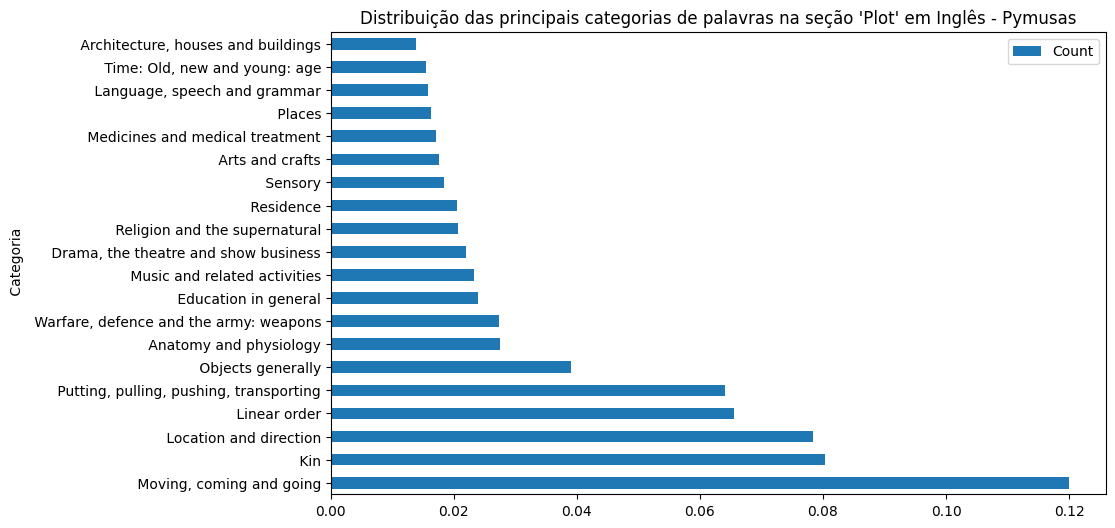

In [44]:
df_plot = df.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras na seção 'Plot' em Inglês - Pymusas")
plt.yticks(fontsize=10)
plt.show()

In [19]:
path = './data/plots_es'
text = ""
list_files = os.listdir(path)
print(list_files)

['Los emigrantes.txt', 'La canción de Bernadette.txt', 'El halcón maltés (película de 1941).txt', 'Atonement (película).txt', 'Picnic (película).txt', 'Barry Lyndon.txt', 'La forma del agua.txt', 'Espejismo de amor.txt', 'Fuego en la nieve (película).txt', 'Hugo (película).txt', 'Three Billboards Outside Ebbing, Missouri.txt', 'Cat on a Hot Tin Roof (película).txt', 'Gladiator.txt', 'The Reader.txt', 'El cielo y tú.txt', 'América, América (película).txt', 'Fugitivos (película de 1958).txt', 'Jerry Maguire.txt', 'Sense and Sensibility (película).txt', 'El orgullo de los Yanquis.txt', 'El séptimo cielo (película).txt', 'El Señor de los Anillos: el retorno del Rey.txt', 'War Horse.txt', 'The Towering Inferno.txt', 'In Old Chicago.txt', 'Mr. Smith Goes to Washington.txt', 'Midnight Cowboy.txt', 'La fuerza del cariño.txt', 'Zorba, el griego (película).txt', 'Pasaje a la India.txt', 'The Magnificent Ambersons.txt', 'Minari.txt', 'Dunkerque (película).txt', 'Hello, Dolly! (película).txt', 'Of

In [20]:
# Função para processar cada texto
def process_text(text):
    output_doc = nlp_es(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

In [24]:
# list_files = ['Fuego en la nieve (película).txt', 'Gladiator.txt', 'El Señor de los Anillos: el retorno del Rey.txt', 'Dunkerque (película).txt', 'Historia de un soldado (película de 1984).txt', 'Patton (película).txt', 'Wò hǔ cáng lóng.txt', 'Enrique V (película de 1944).txt', 'Judgment at Nuremberg.txt', 'Disraeli (película).txt', 'Lincoln (película).txt', 'Chariots of Fire.txt', 'El Señor de los Anillos: la Comunidad del Anillo.txt', 'Foreign Correspondent.txt', 'Amadeus.txt', 'Master and Commander: The Far Side of the World.txt', 'A Few Good Men.txt', '1917 (película).txt', 'Apocalypse Now.txt', 'El puente sobre el río Kwai.txt', 'La favorita (película).txt', 'El gran dictador.txt', 'Los cañones de Navarone.txt', 'Ben-Hur (película de 1959).txt', 'El diario de Ana Frank (película).txt', 'Los mejores años de nuestra vida.txt', 'El expreso de Shanghai.txt', 'The Sand Pebbles.txt', 'Top Gun: Maverick.txt', 'El Álamo (película de 1960).txt', 'Gangs of New York.txt', 'Hamlet (película de 1948).txt', 'La delgada línea roja (película de 1998).txt', 'Casablanca (película).txt', 'Ivanhoe (película de 1952).txt', 'Ninotchka.txt', 'The Robe.txt', '49th Parallel.txt', 'Dances with Wolves.txt', 'Múnich (película).txt', 'The Full Monty.txt', 'Nacido el cuatro de julio.txt', 'Star Wars: Episodio IV - Una nueva esperanza.txt', 'The Queen.txt', 'The Greatest Show on Earth (película de 1952).txt', 'Mister Roberts.txt', 'Nicolás y Alejandra.txt', 'El último emperador.txt', 'Las zapatillas rojas (película de 1948).txt', 'Cleopatra (película de 1963).txt', 'Titanic (película de 1997).txt', 'El capitán Blood (película de 1935).txt', 'El motín del Caine.txt', 'Decision Before Dawn.txt', 'Inglourious Basterds.txt', 'Hasta el último hombre.txt', 'Los miserables (película de 2012).txt', 'The Adventures of Robin Hood.txt', 'Raiders of the Lost Ark.txt', 'La lista de Schindler.txt', 'Z (película).txt', 'The Deer Hunter.txt', 'Tess (película de 1979).txt', 'Django Unchained.txt', 'Mank (película).txt', 'El Señor de los Anillos: las dos torres.txt', 'Saving Private Ryan.txt', 'Braveheart.txt', 'Las minas del rey Salomón (película de 1950).txt', 'Sin novedad en el frente (película de 1930).txt', 'Mad Max: Fury Road.txt', 'El pianista.txt', 'Mutiny on the Bounty (película de 1962).txt', 'Mutiny on the Bounty (película de 1935).txt', 'De aquí a la eternidad.txt', 'The Martian.txt', 'Black Panther (película).txt', 'El patriota (película de 1928).txt', 'Avatar: The Way of Water.txt', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb.txt', '¡Que vienen los rusos!.txt']
results = []
for file in list_files:
    name = file.split(".txt")
    #if name[0] in plots["TITLE_ES"].values:
    article = open(path + "/" + file, 'r')
    content = article.read()
    result = process_text(content)
    for e in result:
        if 'G1' in e["USAS Tags"]:
            print(e['Text'])
    results.append(result)
#results

alemana
alemanes
alemán
oficial
alemán
poder
militar
políticas
políticas
poder
militar
jefe
poder
gobierno
gobierno
cambio
poder
armas
historia
Rey
rey
cambio
servicios
Rey
ayuda
ayuda
podría
ayuda
rey
rey
ayuda
ayuda
Rey
podía
podría
Rey
Rey
rey
cabeza
Rey
rey
podría
poder
pudo
rey
militar
alemán
alemana
militar
alemana
alemanes
oficial
oficial
control
cabeza
alemanes
alemán
grupo
alemanas
alemán
alemán
podría
oficial
oficial
ayuda
seguridad
alemanes
oficiales
seguridad
oficial
nación
militar
autoridades
pública
cargo
alemanes
militar
alemán
alemanas
alemanes
Grupo
alemán
ayuda
Partido
partidos
políticos
alemán
historia
poderes
secreto
historia
secreta
ayuda
historia
rey
cabo
rey
militar
rey
rey
ley
armas
cabeza
control
rey
políticas
tribunal
gobierno
alemán
política
alemán
acuerdo
leyes
tribunal
oposición
políticos
tribunales
estados
posibilidad
estados
Congreso
cabo
estados
Partido
miembros
estados
cambio
Secretario
cambio
ayudar
posibilidades
estados
miembros
Secretario
historia
Un

In [8]:
results

[[{'Text': 'Poco',
   'Lemma': 'poco',
   'POS': 'ADV',
   'USAS Tags': ['Z5', 'Z8', 'A6.1-']},
  {'Text': 'antes',
   'Lemma': 'antes',
   'POS': 'ADV',
   'USAS Tags': ['N4', 'Z5', 'N3', 'T1.1']},
  {'Text': 'de', 'Lemma': 'de', 'POS': 'ADP', 'USAS Tags': ['Z5']},
  {'Text': 'la', 'Lemma': 'el', 'POS': 'DET', 'USAS Tags': ['Z5']},
  {'Text': 'Navidad',
   'Lemma': 'Navidad',
   'POS': 'PROPN',
   'USAS Tags': ['Z99']},
  {'Text': 'de', 'Lemma': 'de', 'POS': 'ADP', 'USAS Tags': ['Z5']},
  {'Text': '1944', 'Lemma': '1944', 'POS': 'NUM', 'USAS Tags': ['N1']},
  {'Text': ',', 'Lemma': ',', 'POS': 'PUNCT', 'USAS Tags': ['PUNCT']},
  {'Text': 'los', 'Lemma': 'el', 'POS': 'DET', 'USAS Tags': ['Z5']},
  {'Text': 'soldados',
   'Lemma': 'soldado',
   'POS': 'NOUN',
   'USAS Tags': ['A1.1.1', 'G3', 'G3/S2mf', 'I2']},
  {'Text': 'estadounidenses',
   'Lemma': 'estadounidense',
   'POS': 'ADJ',
   'USAS Tags': ['Z99']},
  {'Text': 'esperan',
   'Lemma': 'esperar',
   'POS': 'VERB',
   'USAS Tags

In [63]:
df = pd.read_csv("pymusas_dict.csv", sep=";")
df["Count"] = [0 for i in range(len(df))]
df.set_index('Tag', inplace=True)
df

Categoria  Count
Tag                                              
A1              General And Abstract Terms      0
A2                                  Affect      0
A4                          Classification      0
A5                              Evaluation      0
A6                               Comparing      0
..                                     ...    ...
X7             Wanting: planning: choosing      0
X8                                  Trying      0
X9                                 Ability      0
Y1       Science and technology in general      0
Y2    Information technology and computing      0

[101 rows x 2 columns]

In [64]:
for result in results:
    for sub_result in result:
        for tag in sub_result['USAS Tags']:
            if tag in df.index:
                df.at[tag, 'Count'] += 1

df["Count"] = df["Count"] / df["Count"].sum()
df = df.reset_index()

df = df.sort_values(by="Count", ascending=False)
df

Tag                  Categoria     Count
51  M1   Moving, coming and going  0.094414
56  M6     Location and direction  0.078278
67  P1       Education in general  0.039216
30  G1   Government and Politics   0.038194
73  S2                     People  0.033956
..  ..                        ...       ...
93  X4              Mental object  0.000153
94  X5                  Attention  0.000153
40  I3        Work and employment  0.000000
97  X8                     Trying  0.000000
84  T4           Time: Early/late  0.000000

[101 rows x 3 columns]

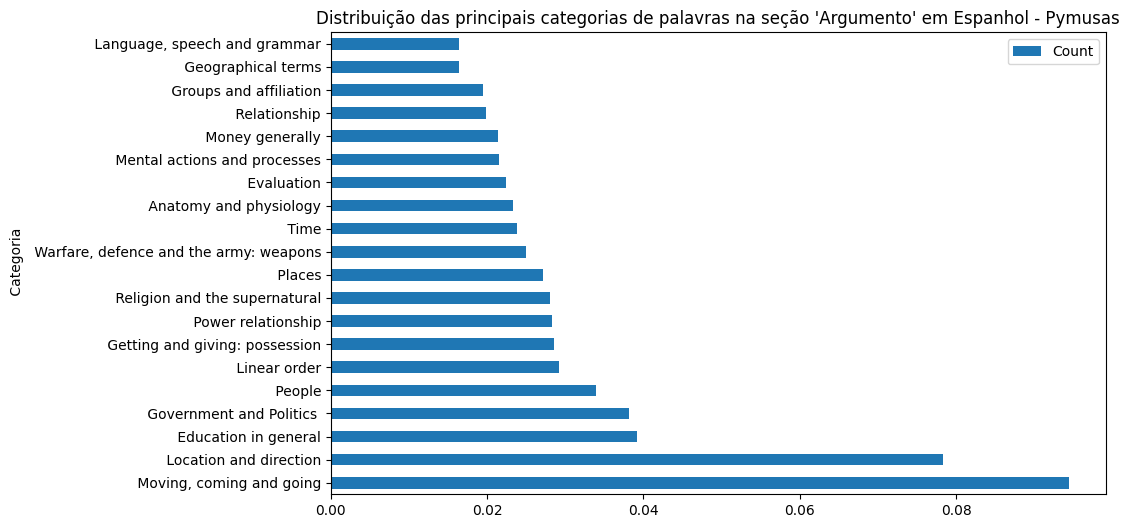

In [65]:
df_plot = df.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras na seção 'Argumento' em Espanhol - Pymusas")
plt.yticks(fontsize=10)
plt.show()

Executando para filmes individuais

In [35]:
def process_text(text):
    output_doc = nlp_es(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

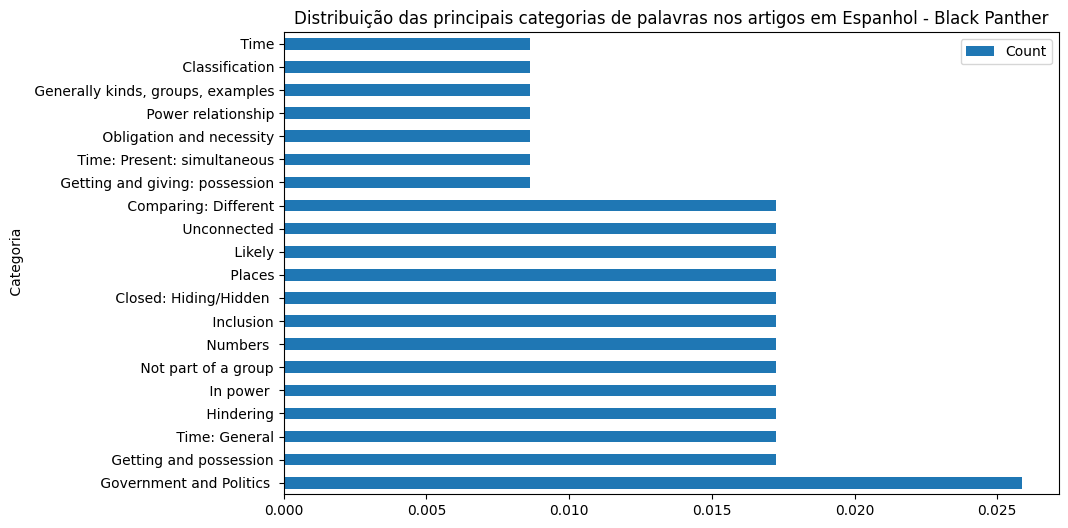

In [86]:
#list_files = ["La La Land (película).txt", "El mago de Oz.txt", "The Sound of Music.txt"]
list_files = ["E.T., el extraterrestre.txt", "Star Wars: Episodio IV - Una nueva esperanza.txt", "Black Panther (película).txt"]
#list_files = ["Everything Everywhere All at Once.txt", "Star Wars: Episódio IV – Uma Nova Esperança.txt", "Black Panther (filme).txt"]
article = open("./data/plots_es/Black Panther (película).txt", 'r')
content = article.read()
result = process_text(content)

df_test = pd.read_csv("pymusas_dict.csv", sep=";")
df_test["Count"] = [0 for i in range(len(df_test))]
df_test.set_index('Tag', inplace=True)

for sub_result in result:
    for tag in sub_result['USAS Tags']:
        if tag == 'A5.4+':
            break
        if tag in df_test.index:
            df_test.at[tag, 'Count'] += 1

df_test["Count"] = df_test["Count"] / df_test["Count"].sum()

df_test.to_csv("teste_df.csv", sep=';', index=True)

df_test = df_test.reset_index()
for index, row in df_test.iterrows():
    if row["Count"] == 0:
        df_test = df_test.drop(index)
df_test = df_test.sort_values(by="Count", ascending=False)


df_aux = df_test.drop([446, 452, 450])

df_plot = df_aux.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras nos artigos em Espanhol - Black Panther")
plt.yticks(fontsize=10)
plt.show()

In [9]:
# Função para processar cada texto
def process_text(text):
    output_doc = nlp_en(str(text))
    result = []
    for token in output_doc:
        result.append({
        'Text': token.text,
        'Lemma': token.lemma_,
        'POS': token.pos_,
        'USAS Tags': token._.pymusas_tags
        })
    return result

In [5]:
film_names_en = []
film_names_es = []
film_names_pt = []

list_direc_en = os.listdir("./data/plots_en/")
list_direc_es = os.listdir("./data/plots_es/")
list_direc_pt = os.listdir("./data/plots_pt/")

for movie in sorted(list_direc_en):
    movie = movie.split(".txt")[0]
    film_names_en.append(movie)

for movie in sorted(list_direc_es):
    movie = movie.split(".txt")[0]
    film_names_es.append(movie)

for movie in sorted(list_direc_pt):
    movie = movie.split(".txt")[0]
    film_names_pt.append(movie)


In [33]:
movies_classification = {
    "Movie that makes social critics": [
        "12 Angry Men (1957 film)", 
        "A Clockwork Orange (film)", 
        "American Beauty (1999 film)", 
        "Get Out", 
        "Crash (2004 film)", 
        "Good Night, and Good Luck", 
        "Network (1976 film)", 
        "The Great Dictator", 
        "The Social Network",
        "Room (2015 film)", 
        "The Revenant (2015 film)",
        "Green Book (film)", 
        "Everything Everywhere All at Once",
        "Don't Look Up",
        "Joker (2019 film)"
    ],
    "Fantasy and Imaginary worlds": [
        "Avatar (2009 film)", 
        "Avatar: The Way of Water", 
        "District 9", 
        "E.T. the Extra-Terrestrial", 
        "Inception", 
        "The Shape of Water", 
        "The Wizard of Oz",
        "Star Wars (film)",
        "The Lord of the Rings: The Fellowship of the Ring", 
        "The Lord of the Rings: The Return of the King", 
        "The Lord of the Rings: The Two Towers"
    ],
    "Movies about historical events or people or War and Fights": [
        "12 Years a Slave (film)", 
        "1917 (2019 film)", 
        "A Man for All Seasons (1966 film)", 
        "A Farewell to Arms (1932 film)", 
        "All the President's Men (film)", 
        "Argo (2012 film)", 
        "Apollo 13 (film)", 
        "Gandhi (film)", 
        "Schindler's List", 
        "Lincoln (film)", 
        "The King's Speech", 
        "The Pianist (2002 film)", 
        "The Last Emperor",
        "Ben-Hur (1959 film)",
        "The Queen (2006 film)", 
        "Cleopatra (1963 film)",
        "Life Is Beautiful",
        "Saving Private Ryan",
        "Ford v Ferrari", 
        "Elvis (2022 film)",
        "The Imitation Game",
        "Inglourious Basterds", 
        "Gladiator (2000 film)",
        "Dunkirk (2017 film)", 
        "Darkest Hour (film)",
        "Bohemian Rhapsody (film)",
        "All Quiet on the Western Front (1930 film)",
        "All Quiet on the Western Front (2022 film)"
    ],
    "Musicals or Comedies or Love": [
        "42nd Street (film)", 
        "An American in Paris (film)", 
        "Anchors Aweigh (film)", 
        "Annie Hall", 
        "Chicago (2002 film)", 
        "Funny Girl (film)", 
        "La La Land", 
        "Mary Poppins (film)", 
        "Moulin Rouge!", 
        "Seven Brides for Seven Brothers", 
        "The Sound of Music (film)", 
        "Top Hat",
        "Beauty and the Beast (1991 film)",
        "Roman Holiday", 
        "Titanic (1997 film)",
        "A Star Is Born (1937 film)", 
        "A Star Is Born (2018 film)"
    ],
    "Movies about life's occurrences": [
        "127 Hours", 
        "A Beautiful Mind (film)", 
        "Boyhood (2014 film)", 
        "Driving Miss Daisy", 
        "Fargo (1996 film)", 
        "Good Will Hunting", 
        "Juno (film)", 
        "Marriage Story", 
        "Ordinary People", 
        "Terms of Endearment",
        "Little Women (1933 film)", 
        "Little Women (2019 film)",
        "Forrest Gump",
        "Once Upon a Time in Hollywood",
        "Midnight in Paris",
        "Gone with the Wind (film)"
    ],
    "Adventure": [
        "Around the World in 80 Days (1956 film)", 
        "Braveheart", 
        "Indiana Jones: Raiders of the Lost Ark", 
        "Life of Pi (film)", 
        "Mad Max: Fury Road", 
        "The Adventures of Robin Hood",
        "Top Gun: Maverick",
        "The Martian (film)"
    ],
    "Power relations": [
        "A Few Good Men", 
        "All the King's Men (1949 film)", 
        "Amadeus (film)", 
        "Dangerous Liaisons", 
        "Doctor Zhivago (film)", 
        "Frost_Nixon (film)", 
        "Henry V (1944 film)", 
        "JFK (film)", 
        "The Godfather", 
        "The Godfather Part II", 
        "The Godfather Part III", 
        "The Wolf of Wall Street (2013 film)"
    ],
    "Others": [
        "49th Parallel (film)", 
        "7th Heaven (1927 film)", 
        "A Room with a View (1985 film)",  
        "A Streetcar Named Desire (1951 film)", 
        "Alice Adams (1935 film)", 
        "All This, and Heaven Too", 
        "Atlantic City (1980 film)", 
        "Babe (film)", 
        "Barry Lyndon",  
        "Birdman (film)", 
        "Black Swan (film)", 
        "Bonnie and Clyde (film)", 
        "Broadcast News (film)", 
        "Cabaret (1972 film)", 
        "Capote (film)", 
        "Casablanca (film)", 
        "Cat on a Hot Tin Roof (1958 film)", 
        "Cavalcade (1933 film)", 
        "Chariots of Fire", 
        "Chinatown (1974 film)", 
        "Citizen Kane", 
        "Coal Miner's Daughter (film)", 
        "Coming Home (1978 film)", 
        "Cries and Whispers", 
        "Crossfire (film)", 
        "Crouching Tiger, Hidden Dragon", 
        "Dances with Wolves", 
        "Dark Victory", 
        "Dead End (1937 film)", 
        "Decision Before Dawn", 
        "Deliverance", 
        "Disraeli (1929 film)", 
        "Doctor Dolittle (1967 film)", 
        "Dodsworth (film)", 
        "Dog Day Afternoon", 
        "Double Indemnity", 
        "Dr. Strangelove", 
        "East Lynne (1931 film)", 
        "Elizabeth (film)", 
        "Erin Brockovich (film)", 
        "Extremely Loud & Incredibly Close (film)", 
        "Fanny (1961 film)", 
        "Fatal Attraction", 
        "Father of the Bride (1950 film)", 
        "Fiddler on the Roof (film)", 
        "Field of Dreams", 
        "Finding Neverland (film)", 
        "Five Easy Pieces", 
        "Five Star Final", 
        "Flirtation Walk", 
        "For Whom the Bell Tolls (film)", 
        "Foreign Correspondent (film)", 
        "Four Weddings and a Funeral", 
        "Friendly Persuasion (1956 film)", 
        "From Here to Eternity", 
        "Funny Girl (film)", 
        "Gangs of New York", 
        "Gaslight (1944 film)", 
        "Gentleman's Agreement", 
        "Giant (1956 film)", 
        "Gigi (1958 film)",  
        "Going My Way", 
        "Gosford Park", 
        "Grand Hotel (1932 film)", 
        "Gravity (2013 film)", 
        "Guess Who's Coming to Dinner", 
        "Hacksaw Ridge", 
        "Hamlet (1948 film)", 
        "Heaven Can Wait (1943 film)", 
        "Heaven Can Wait (1978 film)", 
        "Here Comes Mr. Jordan", 
        "Hold Back the Dawn", 
        "How Green Was My Valley (film)", 
        "How the West Was Won (film)", 
        "Howards End (film)", 
        "Hugo (film)", 
        "I Am a Fugitive from a Chain Gang", 
        "Imitation of Life (1934 film)", 
        "In Old Chicago", 
        "In Which We Serve", 
        "In the Bedroom", 
        "In the Heat of the Night (film)", 
        "In the Name of the Father (film)", 
        "It Happened One Night", 
        "It's a Wonderful Life", 
        "Ivanhoe (1952 film)", 
        "Jaws (film)", 
        "Jerry Maguire", 
        "Jezebel (1938 film)", 
        "Johnny Belinda (1948 film)", 
        "Judgment at Nuremberg", 
        "Julia (1977 film)", 
        "King Solomon's Mines (1950 film)", 
        "Kings Row", 
        "Kiss of the Spider Woman (film)", 
        "Kitty Foyle (film)", 
        "Kramer vs. Kramer", 
        "L.A. Confidential (film)", 
        "La Grande Illusion", 
        "Lady for a Day", 
        "Lawrence of Arabia (film)", 
        "Lenny (film)", 
        "Les Misérables (2012 film)", 
        "Libeled Lady",  
        "Lilies of the Field (1963 film)", 
        "Little Miss Sunshine", 
        "Lost Horizon (1937 film)", 
        "Lost in Translation (film)", 
        "Love Affair (1939 film)", 
        "Love Story (1970 film)", 
        "M*A*S*H (film)", 
        "Manchester by the Sea (film)", 
        "Mank", 
        "Marty (film)", 
        "Master and Commander: The Far Side of the World", 
        "Michael Clayton", 
        "Midnight Cowboy", 
        "Mildred Pierce (film)", 
        "Min and Bill", 
        "Mister Roberts (1955 film)", 
        "Moonlight (2016 film)", 
        "Mrs. Miniver", 
        "Mutiny on the Bounty (1935 film)", 
        "My Fair Lady (film)", 
        "My Left Foot", 
        "Mystic River (film)", 
        "Nashville (film)", 
        "No Country for Old Men (film)", 
        "No Way Out (1950 film)", 
        "Norma Rae", 
        "Ninotchka", 
        "Nomadland (film)", 
        "Notorious (1946 film)", 
        "Now, Voyager", 
        "Of Mice and Men (1939 film)", 
        "On Golden Pond (1981 film)", 
        "On the Waterfront", 
        "One Flew Over the Cuckoo's Nest (film)", 
        "One Foot in Heaven", 
        "One Hour with You",
        "One Night of Love",
        "Out of Africa (film)", 
        "Patton (film)",
        "Pulp Fiction", 
        "Raging Bull", 
        "Rain Man", 
        "Rebecca (1940 film)", 
        "Reds (film)", 
        "Sense and Sensibility (film)", 
        "Sergeant York", 
        "Shakespeare in Love",
        "Silver Linings Playbook",
        "Smilin' Through (1932 film)",
        "Sounder (film)", 
        "Stage Door (film)", 
        "Suspicion (1941 film)", 
        "The Awful Truth", 
        "The Barretts of Wimpole Street (1934 film)", 
        "The Big Chill",
        "The Blind Side (film)", 
        "The Broadway Melody", 
        "The Cardinal (1963 film)", 
        "The Cider House Rules (film)", 
        "The Color Purple (film)", 
        "The Country Girl (1954 film)", 
        "The Crying Game", 
        "The Curious Case of Benjamin Button (film)", 
        "The Deer Hunter", 
        "The Defiant Ones", 
        "The Departed", 
        "The Descendants", 
        "The Diary of Anne Frank (1959 film)", 
        "The Emigrants (film)", 
        "The End of the Affair (1999 film)", 
        "The English Patient (film)", 
        "The Favourite", 
        "The Fighter", 
        "The French Connection (film)", 
        "The Fugitive (1993 film)", 
        "The Full Monty", 
        "The Goodbye Girl", 
        "The Grand Budapest Hotel", 
        "The Grapes of Wrath (film)", 
        "The Green Mile (film)", 
        "The Guns of Navarone (film)", 
        "The Heiress (film)", 
        "The Hours (film)", 
        "The Hurt Locker", 
        "The Hustler (film)",  
        "The Insider", 
        "The Irishman", 
        "The Killing Fields (film)", 
        "The Kids Are All Right (film)", 
        "The Last Picture Show", 
        "The Life of Emile Zola", 
        "The Lion in Winter (1968 film)", 
        "The Little Foxes (film)", 
        "The Lost Weekend", 
        "The Magnificent Ambersons (film)", 
        "The Maltese Falcon (1941 film)", 
        "The Matrix", 
        "The Mission (1986 film)", 
        "The More the Merrier", 
        "The Nun's Story", 
        "The Phantom of the Opera (2004 film)", 
        "The Pride of the Yankees", 
        "The Quiet Man", 
        "The Reader (2008 film)",  
        "The Right Stuff (film)", 
        "The Road to Perdition", 
        "The Rose Tattoo (film)", 
        "The Seventh Heaven", 
        "The Seventh Seal", 
        "The Sixth Sense", 
        "The Social Network", 
        "The Talk of the Town (1942 film)", 
        "The Ten Commandments (1956 film)", 
        "The Thin Man (film)", 
        "The Thin Red Line (1998 film)", 
        "The Third Man", 
        "The Towering Inferno", 
        "The Tree of Life (film)", 
        "The Turning Point (1977 film)", 
        "The Verdict", 
        "The Way We Were", 
        "The White Parade", 
        "The Whistleblower", 
        "The Wind and the Lion", 
        "The Yearling (1946 film)", 
        "There Will Be Blood", 
        "Three Coins in the Fountain (film)", 
        "Three Smart Girls", 
        "Three Times Three", 
        "To Kill a Mockingbird (film)", 
        "Tootsie", 
        "Touch of Evil", 
        "Tower Heist", 
        "Traffic (2000 film)", 
        "Triumph of the Will", 
        "Twelve O'Clock High", 
        "Two for the Seesaw", 
        "Unforgiven",
        "Victor/Victoria (1982 film)", 
        "Waking Ned",
        "West Side Story (2021 film)", 
        "West Side Story (film)", 
        "Whiplash (2014 film)", 
        "Who's Afraid of Virginia Woolf? (film)", 
        "Winter's Bone", 
        "Witness (1985 film)",
        "Wuthering Heights (1939 film)", 
    ]
}

s = 0
for key, value in movies_classification.items():
    for movie in value:
        if movie not in film_names_en:
            value.remove(movie)

    s += len(value)
s

321

In [64]:
plots = pd.read_csv("./data/oscar_full_plot.csv", sep=';')
plots.set_index("TITULO", inplace = True)

for movie in movies_classification["Movie that makes social critics"]:
    movie_name = plots.at[movie, "TITLE_ES"]
    print(movie_name)
    if movie_name in film_names_en:
        article = open("./data/plots_es/" + movie_name + ".txt", 'r')
        content = article.read()
        result = process_text(content)

        df_test = pd.read_csv("pymusas_dict.csv", sep=";")
        df_test["Count"] = [0 for i in range(len(df_test))]
        df_test.set_index('Tag', inplace=True)

        for sub_result in result:
            for tag in sub_result['USAS Tags']:
                if tag in df_test.index:
                    df_test.at[tag, 'Count'] += 1

df_test["Count"] = df_test["Count"] / df_test["Count"].sum()

df_test.to_csv("teste_df.csv", sep=';', index=True)

df_test = df_test.reset_index()
for index, row in df_test.iterrows():
    if row["Count"] == 0:
        df_test = df_test.drop(index)
df_test = df_test.sort_values(by="Count", ascending=False)

df_aux = df_test.drop([36, 55, 211, 446, 452, 450])
#print(df_aux.head(20))

df_plot = df_aux.iloc[:20]
df_plot.plot(x=" Categoria", y=["Count"], kind='barh', figsize=(10,6))
plt.title("Distribuição das principais categorias de palavras nos artigos em Espanhol - Musicais, Comédias ou Romance")
plt.yticks(fontsize=10)
plt.show()

12 Angry Men (película de 1957)


KeyError: 'A Clockwork Orange (film)'

In [83]:
index_df = sorted(plots.index)

list_direc = os.listdir("./data/plots_en/")
list_movies = sorted(list_direc)

print(index_df)
dict_ = {}
for i in range(len(index_df)):
    if index_df[i].upper() == list_movies[i].split(".txt")[0].upper():
        dict_[list_movies[i].split(".txt")[0]] = index_df[i]
    else:
        if index_df[i].upper() in list_movies[i].split(".txt")[0].upper() or list_movies[i].split(".txt")[0].upper() in index_df[i].upper():
            dict_[list_movies[i].split(".txt")[0]] = index_df[i]
        else:
            print(list_movies[i].split(".txt")[0], index_df[i])
print(dict_)

['12 Angry Men (1957 film)', '12 Years a Slave (film)', '127 Hours', '1917 (2019 film)', '42nd Street (film)', '49th Parallel (film)', '7th Heaven (1927 film)', 'A BEAUTIFUL MIND (2001 film)', 'A CLOCKWORK ORANGE (1971 film)', 'A Farewell to Arms (1932 film)', 'A Few Good Men', 'A Letter to Three Wives', 'A Man for All Seasons (1966 film)', 'A PASSAGE TO INDIA (1984 film)', 'A PLACE IN THE SUN (film)', 'A Room with a View (1985 film)', 'A SERIOUS MAN (2009 film)', "A SOLDIER'S STORY (1984 film)", 'A Star Is Born (1937 film)', 'A Star Is Born (2018 film)', 'A Streetcar Named Desire (1951 film)', 'AIRPORT (1970 film)', 'ALL THAT JAZZ (1979 film)', "ALL THE PRESIDENT'S MEN (1976 film)", 'AMADEUS (1984 film)', 'AN EDUCATION (2009 film)', 'ANATOMY OF A MURDER (1959 film)', 'ANCHORS AWEIGH (film)', 'ANNIE HALL (1977 film)', 'APOCALYPSE NOW (1979 film)', 'ARGO (2012 film)', 'AROUND THE WORLD IN 80 DAYS (film)', 'AS GOOD AS IT GETS (1997 film)', 'AVATAR (2009 film)', 'AWAKENINGS (1990 film)', 